In [1]:
#Task 1
#sigmoid implements the sigmoid function that gives the probablity of getting 1 
sigmoid <- function(xi,w){
    return(1/(1+exp(-xi%*%w)))
}

In [2]:
#MSE to calculate the mean squared error of predictions
MSE <- function(y,predY){
    return(mean((predY-y)^2))
}

In [3]:
#gradient function is derivative of negative log likelihood that we are trying to minimize
gradient <- function(g,x,y,w){
    return(t(x)%*%(g(x,w)-y))
}

In [4]:
#gradient_descent calculates the theta or weights for logistic regression 
gradient_descent <- function(g,x,y,learning.step = 0.001,num.epoch=10000,theta = rep(0,ncol(x))){
    
    for (i in 1:num.epoch){
        theta <- theta - learning.step*gradient(g,x,y,theta)        
    }
    return(c(theta))
    
}

In [5]:
#based on the value of sigmoid we calculate the predicted values by rounding it.
logisticPred <- function(x,w){
  prob <- sigmoid(x,w)
  return(round(prob, 0))
}

In [7]:
#Task 2
LoadLibraries <- function(){
    install.packages('ISLR')
    library(ISLR)
    print("The libraries are now loaded")
}
LoadLibraries()
attach(Auto)

High <- ifelse(mpg>=23,1,0)
Auto <- data.frame(Auto,High)

dummy1 <- ifelse(origin==1,1,0)
dummy2 <- ifelse(origin==2,1,0)
Auto <- data.frame(Auto,dummy1)
Auto <- data.frame(Auto,dummy2)

Auto.label <- as.matrix(High)
Auto.data <- as.matrix(Auto[, c(4,5,7,11,12)])

Auto.data <- scale(Auto.data)
Auto.data <- cbind(rep(1,nrow(Auto.data)),Auto.data)


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


[1] "The libraries are now loaded"


In [8]:
#Task 3
#splitting the data in two equal parts randomly as train and test sets.
set.seed(2501)
indexTrain <- sample(1:nrow(Auto.data), size = nrow(Auto.data)/2)
X <- Auto.data[indexTrain,]
X_test <- Auto.data[-indexTrain,]
y <- Auto.label[indexTrain,1]
y_test <- Auto.label[-indexTrain,1]

In [9]:
#Task4
# randomtheta is the initial theta in range [-0.7,0.7]
set.seed(2501)
randomtheta <- runif(ncol(X),min=(-0.7),max=0.7)

# we find the theta using gradient descent function
theta <- gradient_descent(sigmoid,X,y,randomtheta)

# we find predZ , the probablity of 1 using sigmoid function
#predZ <- sigmoid(X_test,theta)

#find the actual value of predicted label
pred <- logisticPred(X_test,theta)

#the test MSE is calculated using MSE function defined above.
testMSE<- MSE(pred,y_test)
#also calculating the trainMSE with same parameters
trainMSE <- MSE(logisticPred(X,theta),y)

#table
print("Test vs Training MSE with learning rate as 0.001 and stopping rule as 10000")
table(testMSE,trainMSE)

[1] "Test vs Training MSE with learning rate as 0.001 and stopping rule as 10000"


                   trainMSE
testMSE             0.683673469387755
  0.622448979591837                 1

In [10]:
#lets try training model using different values of learning rate as 0.01 and stopping rules as 1000
 learning.rate <- c(0.0001,0.001)
 stopping.rule <- c(10,100,1000)

 for(i in learning.rate){
     for(j in stopping.rule){
        theta<- gradient_descent(sigmoid,X,y,i,j,randomtheta)
#calculating test and training MSE
        testMSE <- MSE(logisticPred(X_test,theta),y)
        trainMSE <- MSE(logisticPred(X,theta),y)
        cat("\n\n Test vs Training MSE with learning rate as ",i," and stopping rule as", j, "\n\n")
        print(table(testMSE,trainMSE))
     }
}





 Test vs Training MSE with learning rate as  1e-04  and stopping rule as 10 

                  trainMSE
testMSE            0.224489795918367
  0.48469387755102                 1


 Test vs Training MSE with learning rate as  1e-04  and stopping rule as 100 

       trainMSE
testMSE 0.158163265306122
    0.5                 1


 Test vs Training MSE with learning rate as  1e-04  and stopping rule as 1000 

                   trainMSE
testMSE             0.11734693877551
  0.530612244897959                1


 Test vs Training MSE with learning rate as  0.001  and stopping rule as 10 

       trainMSE
testMSE 0.158163265306122
    0.5                 1


 Test vs Training MSE with learning rate as  0.001  and stopping rule as 100 

                   trainMSE
testMSE             0.11734693877551
  0.530612244897959                1


 Test vs Training MSE with learning rate as  0.001  and stopping rule as 1000 

                   trainMSE
testMSE             0.107142857142857
  0.540

In [11]:
#task 6
#the best test MSE from above was with learning.rate as 0.0001 and stopping.rule as 10
# we try to loop 100 times with random thetas every time and find the test MSE of them to plot a boxplot

testMSE <- vector()
for(i in 1:100){
    #set.seed(Sys.time())
    randomTheta<- runif(ncol(X),min=(-0.7),max=0.7)
    theta<- gradient_descent(sigmoid,X,y,0.0001,10,randomtheta)
    testMSE[i] <- MSE(logisticPred(X_test,theta),y)
}

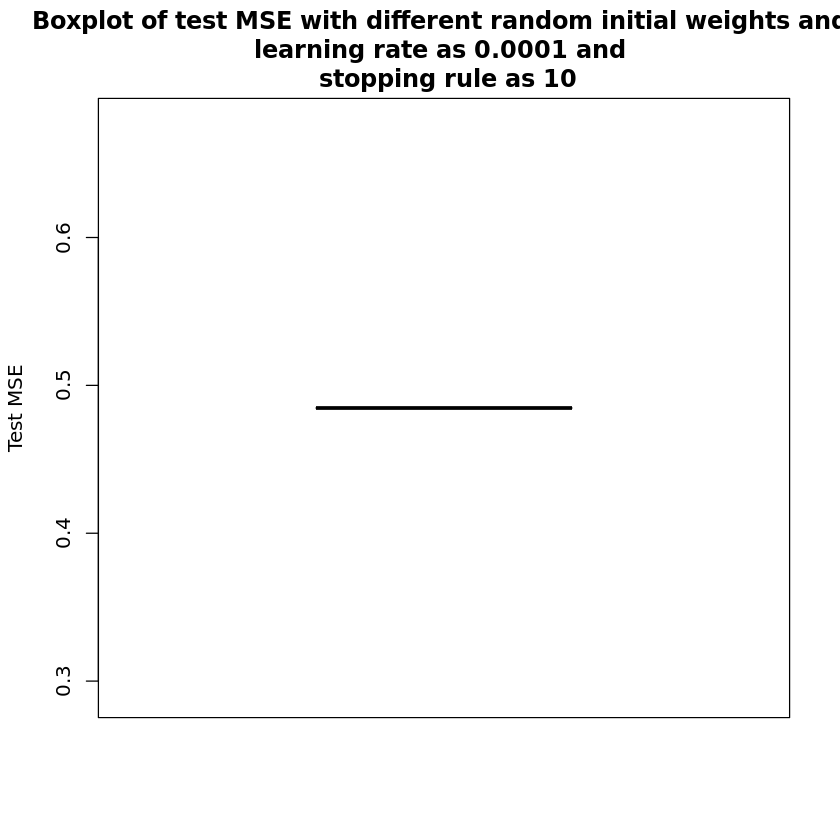

In [12]:
boxplot(testMSE, ylab = "Test MSE",main="Boxplot of test MSE with different random initial weights and \nlearning rate as 0.0001 and \n stopping rule as 10")

the initial weights actually doesnt make any difference to the test MSE but the parameters like learning_rate and stopping_rule do make some difference in the MSE.